net_p {'gpu_id': 'cpu', 'net_name': 'composition', 'net_list': [{'net_name': 'KNN', 'sizes': [256, 256], 'dim_cor': [64, 64], 'mode': 'tensor', 'weights': 'distance'}]}
reg_p {'reg_name': None, 'gpu_id': 'cpu'}
data_p {'data_shape': (256, 256), 'random_rate': 0.5, 'pre_full': True, 'mask_type': 'random', 'down_sample_rate': 2, 'data_type': 'gray_img', 'data_path': './data/img/baboon.bmp', 'down_sample': [1, 1, 1], 'mask_path': None, 'mask_shape': 'same', 'seeds': 88, 'noise_mode': None, 'noise_parameter': 0.0, 'x_mode': 'inr', 'batch_size': 128, 'shuffle_if': False, 'xrange': 1, 'ymode': 'completion', 'return_data_type': 'tensor', 'out_dim_one': True}
opt_p {'net': {'opt_name': 'Adam', 'lr': 0.1, 'weight_decay': 0}, 'reg': {'opt_name': 'Adam', 'lr': 0.0001, 'weight_decay': 0}}
train_p {'train_epoch': 20, 'task_name': 'completion', 'loss_fn': 'mse'}
show_p {'show_type': 'gray_img', 'show_content': 'original'}
save_p {}


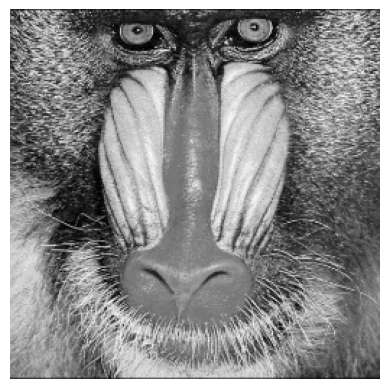

loss on test set 0.05245775729417801
loss on test set 0.007909557782113552
loss on test set 0.003967864904552698
loss on test set 0.0035101529210805893
loss on test set 0.003429981879889965
loss on test set 0.0030985279008746147
loss on test set 0.0030995579436421394
loss on test set 0.0030982308089733124
loss on test set 0.0030984377954155207
loss on test set 0.0030381884425878525
23.034050226211548
PSNR= 23.020110959386656 dB


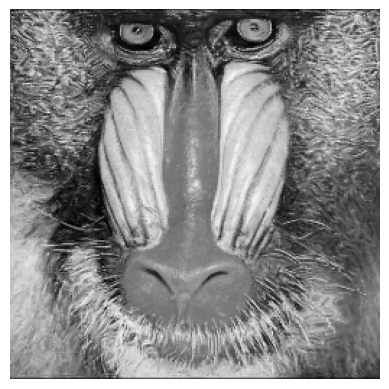

In [3]:
# random sampling
import rss
import numpy as np
import time
start_time = time.time()
    
parameters = {}
net_list = []
net_list.append({'net_name':'KNN','sizes':[256,256],'dim_cor':[64,64],'mode':'tensor','weights':'distance'})

parameters['net_p'] = {'gpu_id':'cpu','net_name':'composition','net_list':net_list}
parameters['data_p'] = {'data_shape':(256,256),'random_rate':0.5,
                        'pre_full':True,'mask_type':'random','down_sample_rate':2,
                        'data_type':'gray_img','data_path':'./data/img/baboon.bmp'}
parameters['train_p'] = {'train_epoch':20}
parameters['show_p'] = {'show_type':'gray_img','show_content':'original'}
parameters['opt_p'] = {'net': {'opt_name': 'Adam', 'lr': 1e-1, 'weight_decay': 0}}
rssnet = rss.rssnet(parameters)

rssnet.show()
rssnet.show_p['show_content'] = 'recovered'
rssnet.net.net_list[0].update_neighbor(n_neighbors=8,mask=rssnet.mask.cpu())
for i in range(10):
    rssnet.train()
    if i % 4 == 0:
        rssnet.net.net_list[0].update_neighbor(n_neighbors=8,mask=rssnet.mask.cpu(),mode='patch',labda=1,n_components=8)
print(time.time()-start_time)
rssnet.show()

net_p {'gpu_id': 'cpu', 'net_name': 'composition', 'net_list': [{'net_name': 'KNN', 'sizes': [10, 10], 'dim_cor': [10, 10], 'mode': 'tucker', 'weights': 'distance'}]}
reg_p {'reg_name': None, 'gpu_id': 'cpu'}
data_p {'data_shape': (10, 10), 'random_rate': 0.5, 'pre_full': True, 'mask_type': 'down_sample', 'down_sample_rate': 4, 'data_path': None, 'data_type': 'syn', 'down_sample': [1, 1, 1], 'mask_path': None, 'mask_shape': 'same', 'seeds': 88, 'noise_mode': None, 'noise_parameter': 0.0, 'x_mode': 'inr', 'batch_size': 128, 'shuffle_if': False, 'xrange': 1, 'ymode': 'completion', 'return_data_type': 'tensor', 'out_dim_one': True}
opt_p {'net': {'opt_name': 'Adam', 'lr': 0.0001, 'weight_decay': 0}, 'reg': {'opt_name': 'Adam', 'lr': 0.0001, 'weight_decay': 0}}
train_p {'train_epoch': 20, 'task_name': 'completion', 'loss_fn': 'mse'}
show_p {'show_type': 'gray_img', 'show_content': 'original'}
save_p {}


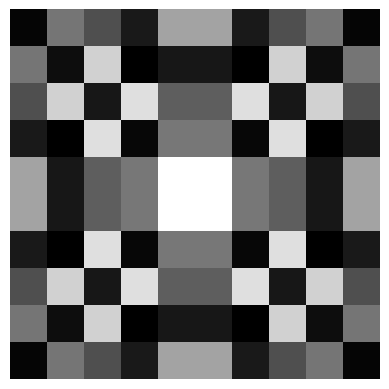

loss on test set 0.5040428042411804


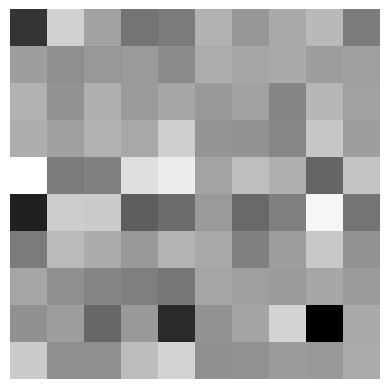

loss on test set 0.5038914680480957


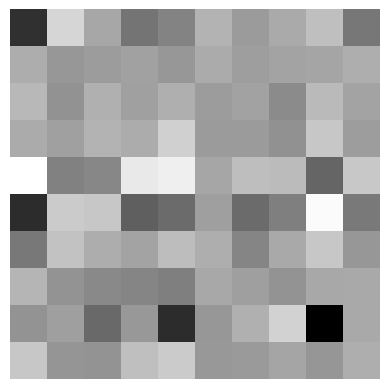

loss on test set 0.5037267208099365


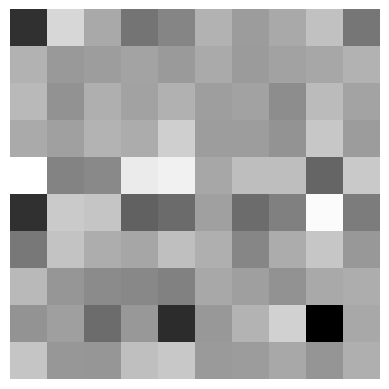

loss on test set 0.5035470724105835


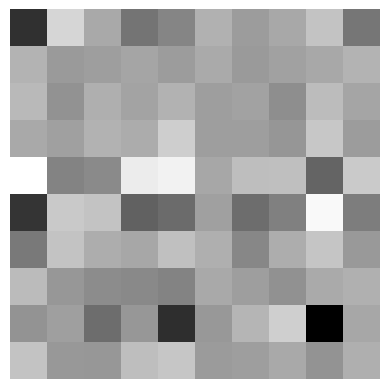

loss on test set 0.5033523440361023


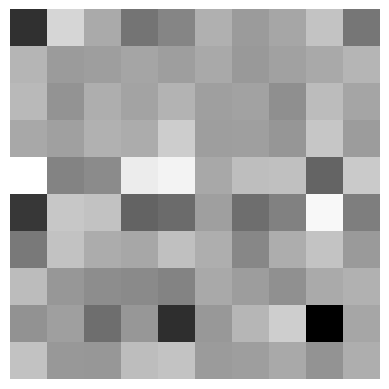

loss on test set 0.5031426548957825


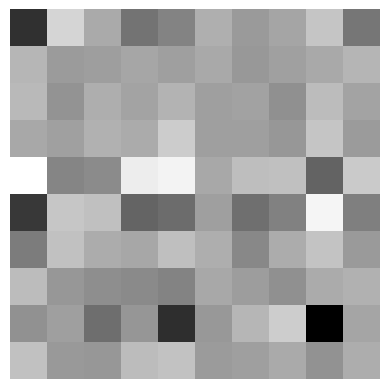

loss on test set 0.5029178857803345


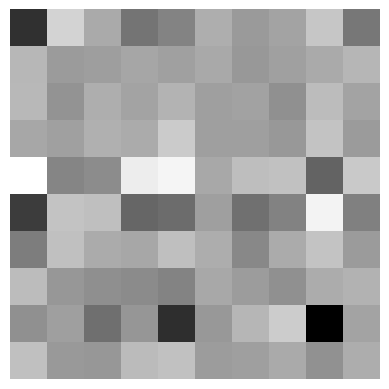

loss on test set 0.5026777386665344


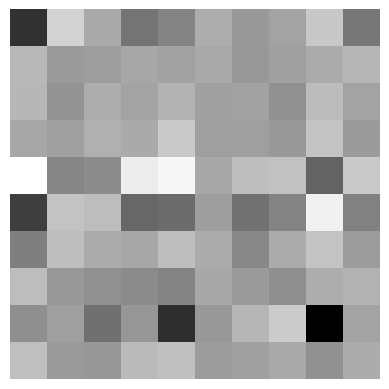

loss on test set 0.5024222135543823


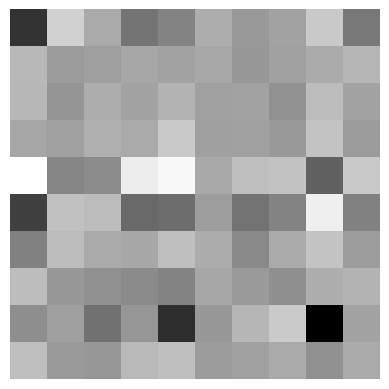

loss on test set 0.50215083360672


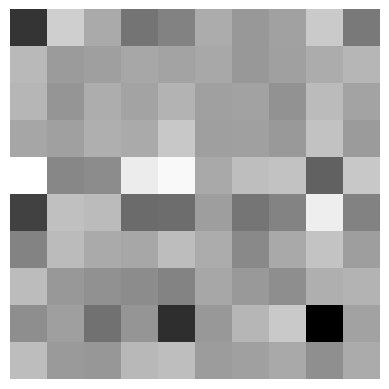

In [1]:
# Tucker for random sampling
import rss
import numpy as np

    
parameters = {}
net_list = []
net_list.append({'net_name':'KNN','sizes':[256,256],'dim_cor':[256,256],'mode':'tensor'})

parameters['net_p'] = {'gpu_id':0,'net_name':'composition','net_list':net_list}
parameters['data_p'] = {'data_shape':(256,256),'random_rate':0.5,
                        'pre_full':True,'mask_type':'patch','down_sample_rate':2,
                        'data_type':'gray_img','data_path':'./data/img/man.bmp'}
parameters['train_p'] = {'train_epoch':10000}
parameters['show_p'] = {'show_type':'gray_img','show_content':'original'}
rssnet = rss.rssnet(parameters)

rssnet.show()
rssnet.show_p['show_content'] = 'recovered'
rssnet.net.net_list[0].update_neighbor(n_neighbors=5,mask=rssnet.mask.cpu())
for i in range(10):
    rssnet.train()
    rssnet.show()
    